In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re

In [12]:
from tika import parser

In [38]:
font_name = {'fontname': 'Source Sans Pro'}
mono_name = {'fontname': 'Source Serif Pro'}
font_size = {'fontsize': 13}
color_label = {'color': '#333333'}

In [18]:
lines = ''

for i in range(1,4):
    with open('00{}ssb.txt'.format(i)) as f_in:
        lines += ''.join(f_in.readlines())

raw = parser.from_file('4.pdf')
lines += raw['content']
raw = parser.from_file('adwdasoiaf5.pdf')
lines += raw['content']
    
between_bn = re.compile(r'(\n+[\d]+[ ]*\n+)')
multiple_bn = re.compile(r'\n+')
text = re.sub(between_bn, '', lines)
raw = re.sub(multiple_bn, '', text)

sentences = [s for s in nltk.sent_tokenize(raw)]
tokens = [t.lower() for t in nltk.word_tokenize(raw) if t.isalpha()]

In [19]:
ntext = nltk.Text(tokens)

In [20]:
def get_dispersion(text, word, flag=None):
    if flag:
        return [flag if word == w else np.nan for i, w in enumerate(text)]
    return [i+1 if word == w else np.nan for i, w in enumerate(text)]

In [36]:
chars = (
    get_dispersion(ntext, 'jon', flag=1.1),
    get_dispersion(ntext, 'tyrion', flag=1.2),
    get_dispersion(ntext, 'daenerys', flag=1.3),
    get_dispersion(ntext, 'cersei', flag=1.4),
    get_dispersion(ntext, 'jaime', flag=1.5),
    get_dispersion(ntext, 'sansa', flag=1.6),
    get_dispersion(ntext, 'arya', flag=1.7),
    get_dispersion(ntext, 'sam', flag=1.8)
)

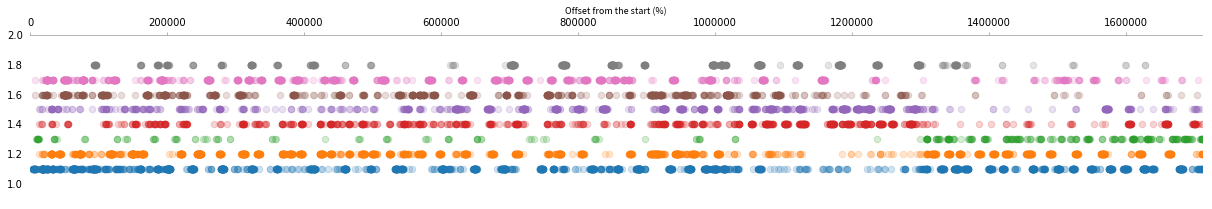

In [40]:
fig, ax = plt.subplots(figsize=(21,3))

for char in chars:
    flag = next(filter(lambda x: x != np.nan, char))
    ax.plot(np.arange(0, len(char)), [flag for _ in range(len(char))], linewidth=15, color='#f3f3f3', zorder=1)

for char in chars:
    ax.scatter(np.arange(0, len(char)), char, s=42, marker='o', alpha=.2, zorder=2)

#ax.set_title('About Naoko and Midori');
#ax.set_yticks([1,1.1])
ax.set_ylim([0.9,2.0])
ax.set_xlim([0,len(chars[0])])

#ax.set_xticklabels(map(lambda x: '{0:.0f}%'.format((100*x)/120000), [0, 20000, 40000, 60000, 80000, 100000, 120000]), **color_label, **mono_name)
#ax.set_yticklabels(['Naoko ({})'.format(freq.get('naoko')), 'Midori ({})'.format(freq.get('midori'))], **font_name, **font_size);

ax.set_xlabel('Offset from the start (%)', **font_name);

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('#a3a3a3')

#plt.savefig('naoko_midori.pdf', dpi=100, bbox_inches='tight')